# Домашняя работа №5.

In [32]:
import io
import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy import stats

* Написать модель (с помощью выдвижения гипотез или применяя модель Random Forest) на датасет больных сердечными болезнями.

In [94]:
url="http://yustiks.ru/dataset/cardio_train.csv"
data=pd.read_csv(url,sep=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Описание данных\
\
Есть 3 типа входных функций:
\
Цель: фактическая информация;\
Обследование: результаты медицинского осмотра;\
Субъективно: информация, предоставленная пациентом.\
Функции:\
\
Возраст | Объективная особенность | возраст | int (дни)\
Высота | Объективная особенность | высота | int (см) |\
Вес Объективная особенность | вес | плавать (кг) |\
Пол | Объективная особенность | пол | категориальный код |\
Систолическое артериальное давление | Экзаменационная функция | ap_hi | Int |\
Диастолическое артериальное давление | Экзаменационная функция | ap_lo | Int |\
Холестерин | Экзаменационная функция | холестерин | 1: нормально, 2: выше нормы, 3: значительно выше нормы |\
Глюкоза | Экзаменационная функция | глюк | 1: нормально, 2: выше нормы, 3: значительно выше нормы |\
Курение | Субъективная особенность | курить | двоичный |\
Потребление алкоголя | Субъективная особенность | Алко | двоичный |\
Физическая активность | Субъективная особенность | активный | двоичный |\
Наличие или отсутствие сердечно-сосудистых заболеваний | Целевая переменная | кардио | двоичный |\
Все значения набора данных были собраны на момент медицинского осмотра.

In [131]:
dataset = data.iloc[:,1:12]
dataset.loc[dataset['age'] > 0, 'age'] = dataset.age/365
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.391781,2,168,62.0,110,80,1,1,0,0,1
1,55.419178,1,156,85.0,140,90,3,1,0,0,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0
3,48.282192,2,169,82.0,150,100,1,1,0,0,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0


Данный датасет разобран в начале лекции 5. Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравнваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима)

Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

In [3]:
print('Количество выбросов в data: '+str(data.isnull().sum().sum()))

Количество выбросов в data: 0


In [5]:
print('Количество пациентов:', len(data))

Количество пациентов: 70000


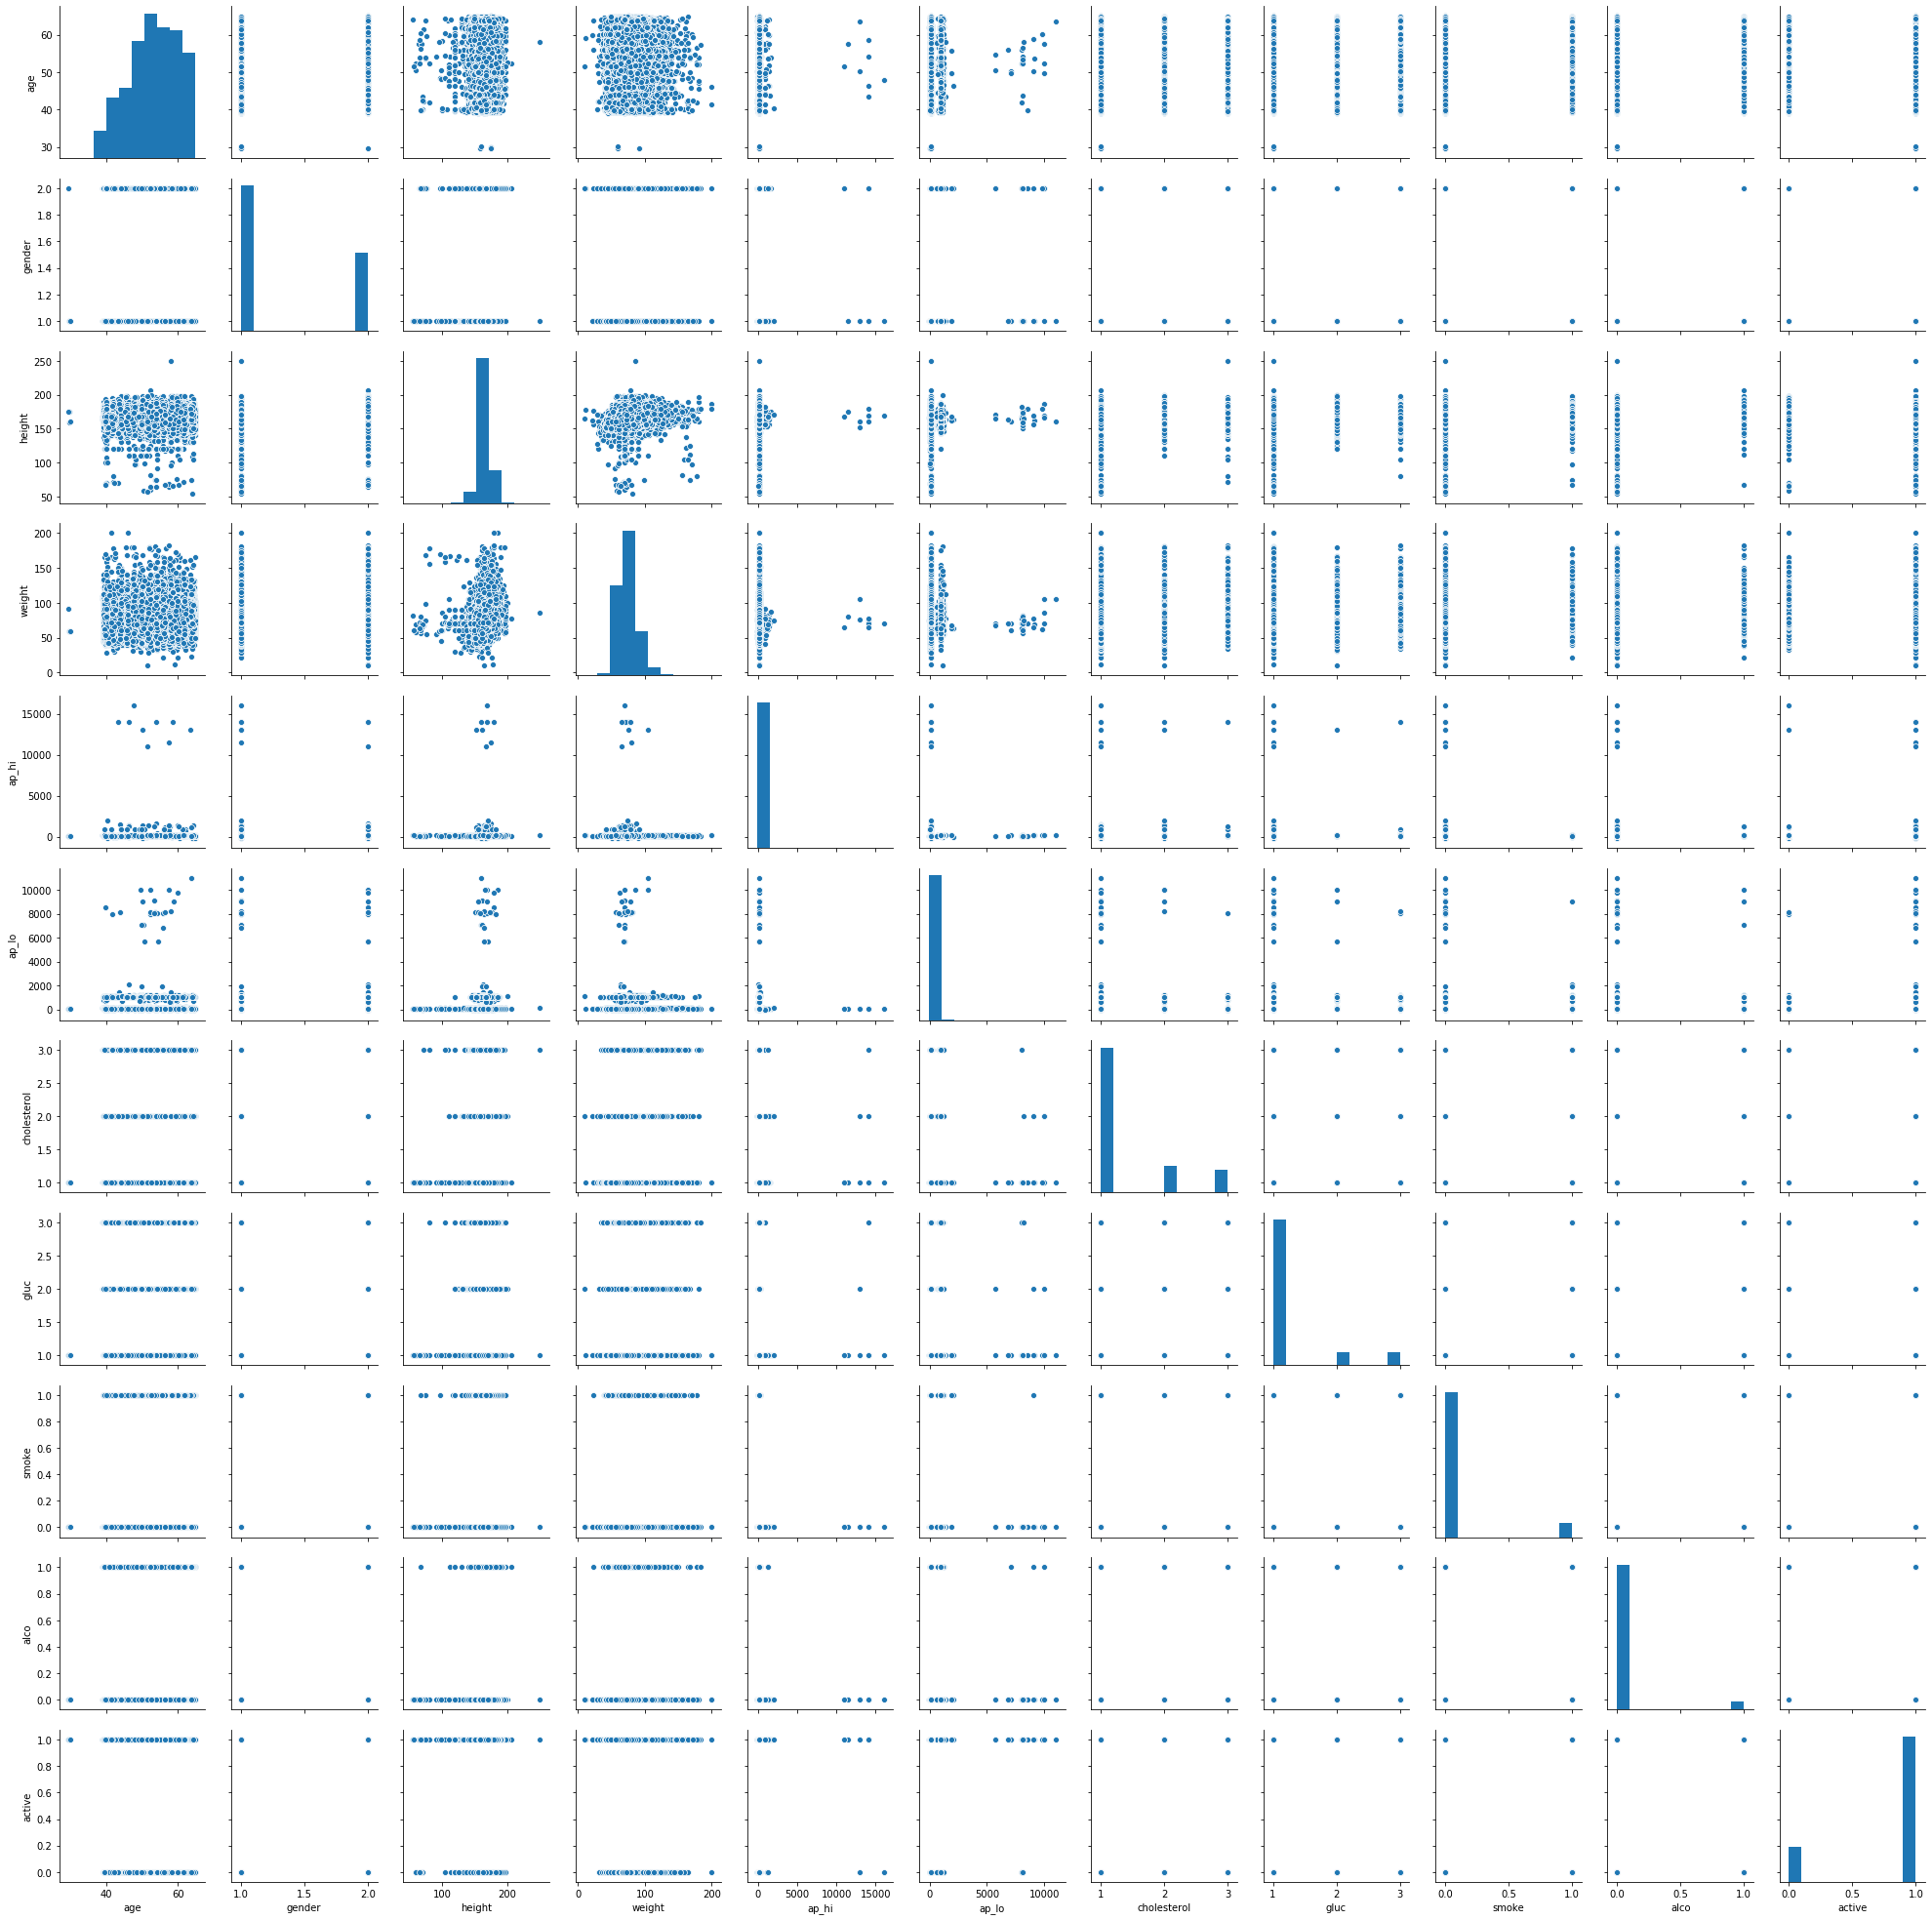

In [133]:
g = sns.pairplot(dataset)

In [132]:
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000


In [127]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

X = data.iloc[:,1:12]
Y=le.fit_transform(data.cardio)

from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(X, Y, test_size=0.3)

In [128]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


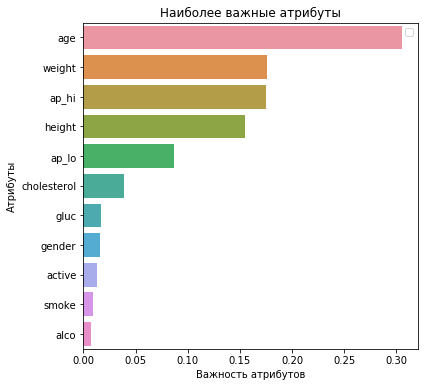

In [129]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [130]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     10470
           1       0.72      0.71      0.72     10530

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



0.7181428571428572